In [18]:
import pandas as pd
import numpy as np
from IPython.display import Image

# Predicting Euthanasia in Animal Shelters 


## Phil Cork
### Fall 2021, PPOL 564

## Problem Statement

This project seeks to predict the outcome for dogs entering the animal services system of three cities to analyze trends and identify opportunities for improvement.

Can we use machine learning to successfully identify which dogs are most likely to be euthanized? 

Are any of the trends the model identifies notable or divergent from general perception?

## Background Info

Of the three cities included, Austin, TX is the only municipality that operates a public no-kill shelter.

The other two cities, Dallas, TX, and Louisville, KY, do not specifically identify as no-kill shelters, but have also shown progress towards this goals:

- Louisville Metro Animal Services reports they have had zero euthanasia instances due to time or space capacity restraints since 2016. 

- Dallas Animal Services reports that the number of euthanasias has dropped every year since 2014, even while intake has increased.

These are signs of encouraging progress from recently implemented policies. This predictive model aims to help identify additional opportunities for continuing these positive developments.

## Data Overview

- Each city provides data regarding the intake and outcomes for animals dating back to 2014 via the Data.gov platform


- When subsetting to only dogs with known outcomes, the cleaned dataset includes approx. 220,000 observations.


- Predictor variables include the dog's:
    - breed & breed group
    - health condition
    - age
    - physical attributes
    - intake reason (owner surrender, stray, etc.)

## Initial Conceptual Approaches


### City-Level Unit of Analysis
- Initially, the project looked to examine the comparative effectiveness between cities regarding euthanasia rates and levels of funding.


- This line of analysis was set aside after realizing aggregating the provided level of analysis would result in too much information loss.

### Aggregate Dataset Analysis
- With a focus on the individual observation unit of analysis, the project continued by combining the three city data sources into one cohesive dataset.


- While intending to train and test models that could generalize across all three sources, it became clear that it would be more effective to tun models to each city for comparative purposes.

## Data Wrangling Approaches

### 1) Consolidating Categories
- One of the first steps in preparing the final dataset included standardizing categorical conventions across the three disparate sources.


- Example: Transforming the data such that a "brown/white" dog would be understood as similar to a "white/brown" dog or a "white and brown" dog


- This process was repeated for almost every feature in the dataset to varying degrees

### 2) Transforming Date Data

- Created a new variable for days spent in the system from the intake and outcome dates provided.


- Similarly, used intake age or birthdate data to create a new variable for age upon outcome.

## Data Wrangling Approaches

### 3) Dichotomous Breed Variables & Breed Groups

- Between the different shelter systems, the variety of dog breeds, and the subjectivity of determining a dog's breed, the combined dataset contained over 4,900 unique entries for breed.


 - This variable was corrected and consolidated into a list of ~220 breeds, each represented as a dummy variable.
 
 
- Finally, based on which breeds were represented, each observation was categorized into Breed Groups as defined by the American Kennel Club.

## Model Considerations

- With a dataset of almost entirely dichonotmous variables, the tools used must be robust to handle a large number of dimensions and binary options.


- Thus, Decision Trees and Random Forests become frontrunners for inclusion in an initial search due to their inherent branching and splitting structure.


- Included are K-Nearest Neighbors for evaluating how well it handles the high dimensionality, as well as Naive Bayes for a baseline.


- For performance considerations, each model was tuned with relatively modest parameters. These will likely need to be optimized upon choosing a smaller set of models.

In [19]:
table = pd.read_csv('model_test_score_table.csv')
table = table.set_index('model')

## Model Evaluation

Initial evaluations were conducted using only the Austin dataset. Below are the average test scores measured during a tenfold cross validation process.

- Naive Bayes performed barely better than a coin toss


- K-Nearest Neighbors performed better, particularly as the number of neighbors increased.


In [20]:
table[0:5]

,mean_test_score
model,
GaussianNB,0.517262
"KNN, neighbors:5",0.628273
"KNN, neighbors:10",0.672586
"KNN, neighbors:25",0.726415
"KNN, neighbors:50",0.745051


## Model Evaluation

- Decision Trees improved further on the previous two models, correctly predicting ~ 3 out of 4 observations


- Random Forests, perhaps unsurprisingly, performed best with so many dichotomous variables, particularly with deeper end notes and more trees in the ensemble

In [21]:
table[6:]

,mean_test_score
model,
"DecisionTree, maxdepth:3",0.765437
"DecisionTree, maxdepth:4",0.795708
"RandomForest, maxdepth:2, trees:500",0.814144
"RandomForest, maxdepth:2, trees:1000",0.814582
"RandomForest, maxdepth:2, trees:1500",0.814456
"RandomForest, maxdepth:3, trees:500",0.818694
"RandomForest, maxdepth:3, trees:1000",0.819786
"RandomForest, maxdepth:3, trees:1500",0.820136
"RandomForest, maxdepth:4, trees:500",0.824213


## Feature Importance
- From the inital models built using the Austin dataset, the results of the permutation importance test show that for each variable, the Reduction in the AUC ROC is approximately .02 for the most important features.


- The most important variables are *days_in*, the length of time a dog is in the shelter, followed by several relatively infrequent breeds.


- Looking at the partial dependence plots for the top four variables, as well as *age_days*, the granularity of improvement based on each feature becomes more clear 

In [22]:
figure = Image("figure_1.png")

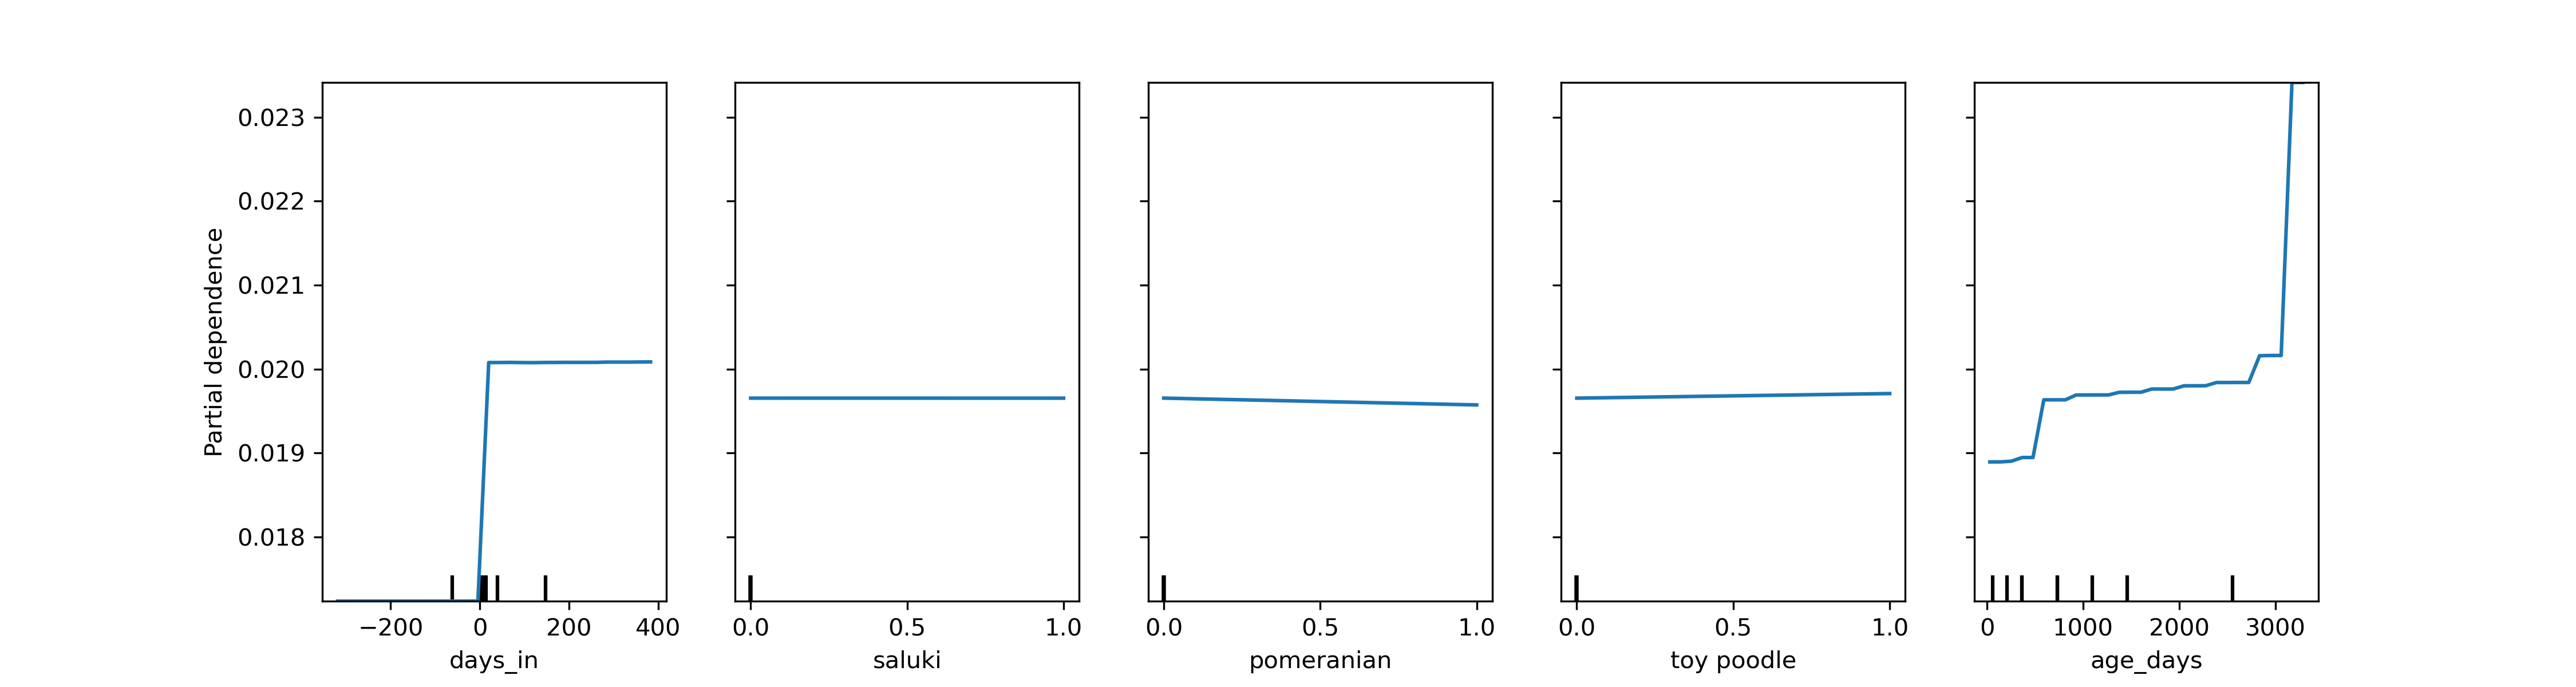

In [23]:
figure


## Challenges & Next Steps

- The model appears to be overfitting with an accuracy of .98, compared to a means test score of .82

    
- To combat overfitting, further tuning model parameters:
    - Building more trees or more robust subsets of columns for random forest implementation. 
    - Considering other high-dimension models such as SVMs. 
    - Investigating dimension reduction tools like PCA.


- From there, next steps will be to build similar models for each remaining city and then compare their predictive power and feature importance.


## Thanks!

Here's a picture of two of our dogs as a reward for making it this far.

In [31]:
dogs = Image("dogs.jpg")

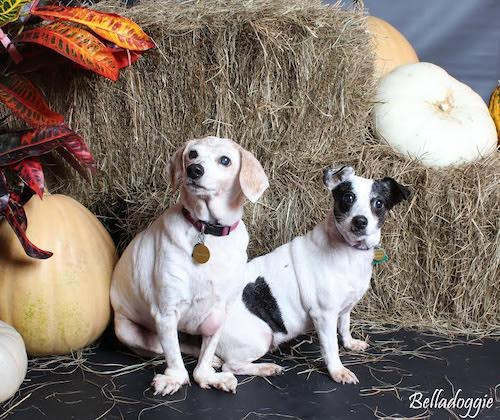

In [32]:
dogs

P.S. They'd have been euthanized had my wife not seen a 'last call' post on Facebook.